### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

           WATER PROTEIN  FAT LACTOSE  ASH
HORSE       90.1     2.6  1.0     6.9 0.35
ORANGUTAN   88.5     1.4  3.5     6.0 0.24
MONKEY      88.4     2.2  2.7     6.4 0.18
DONKEY      90.3     1.7  1.4     6.2 0.40
HIPPO       90.4     0.6  4.5     4.4 0.10
CAMEL       87.7     3.5  3.4     4.8 0.71
BISON       86.9     4.8  1.7     5.7 0.90
BUFFALO     82.1     5.9  7.9     4.7 0.78
GUINEA_PIG  81.9     7.4  7.2     2.7 0.85
CAT         81.6    10.1  6.3     4.4 0.75
FOX         81.6     6.6  5.9     4.9 0.93
LLAMA       86.5     3.9  3.2     5.6 0.80
MULE        90.0     2.0  1.8     5.5 0.47
PIG         82.8     7.1  5.1     3.7 1.10
ZEBRA       86.2     3.0  4.8     5.3 0.70
SHEEP       82.0     5.6  6.4     4.7 0.91
DOG         76.3     9.3  9.5     3.0 1.20
ELEPHANT    70.7     3.6 17.6     5.6 0.63
RABBIT      71.3    12.3 13.1     1.9 2.30
RAT         72.5     9.2 12.6     3.3 1.40
DEER        65.9    10.4 19.7     2.6 1.40
REINDEER    64.8    10.7 20.3     2.5 1.40
WHALE      

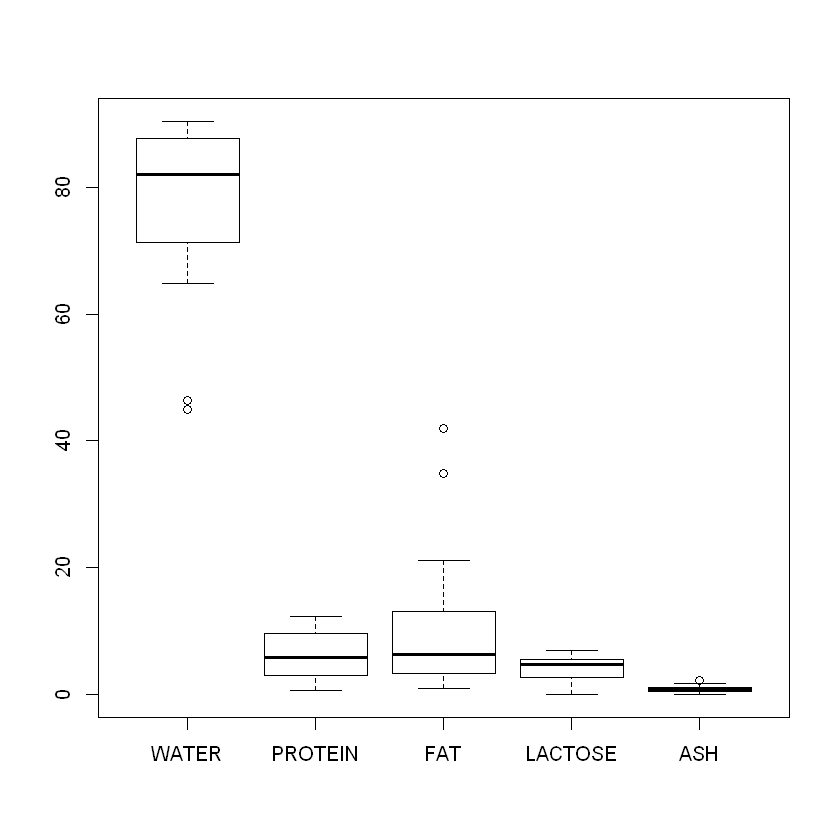

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)
print(datos)
boxplot(datos)

Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

Respuesta: los datos representan la composición de la leche de 25 mamiferos. Destaca que el porcentaje de agua tiene gran variacion del 44 al 90 por ciento..
Realizar un analisis de agrupamiento en este caso es buscar similitudes entre los mamiferos en funcion de las caracteristicas de su leche, es beneficioso porque se puede clasificar la información sin contar con la definicion de grupos previamente.

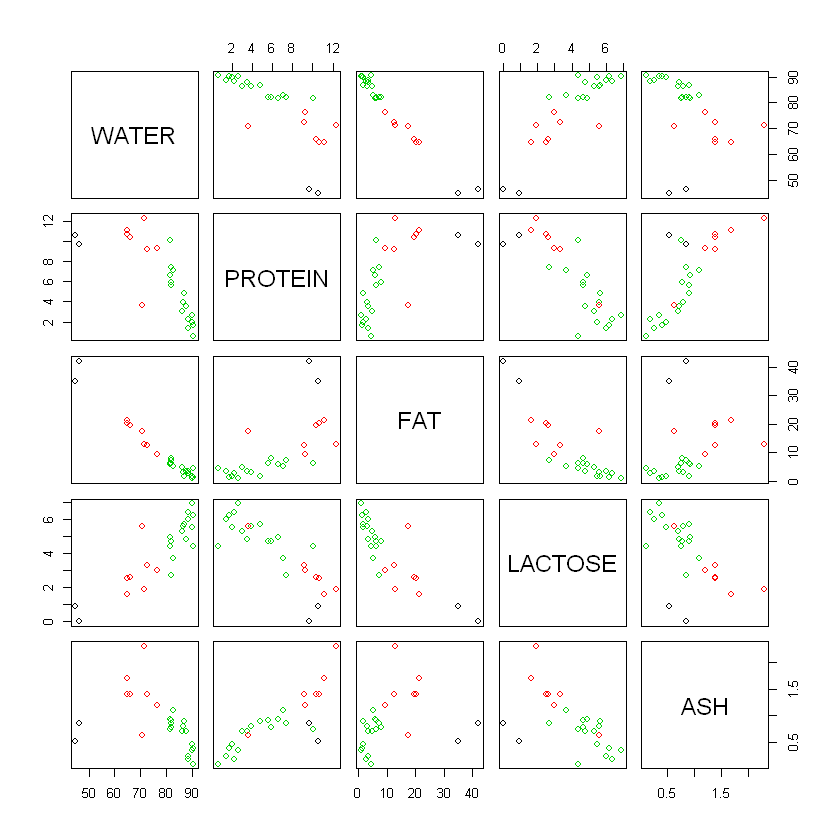

In [2]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Ejercicio 2: Interprete y comente los resultados obtenidos. 


Respuesta: Los datos se agrupan en 3 grupos, negro, rojo y verde. Como tenemos 5 varibles, realizamos mas graficos para poder visualizar de mejor manera los datos. Estos nos muestra cual es la relacion entre los grupos y se indica la distancia entre los valores obtenidos.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
1.243827,0.0248324,0.07949783,-0.02299768,0.004865841


K-means clustering with 3 clusters of sizes 2, 7, 16

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 45.65000 10.150000 38.45000 0.450000 0.690000
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 86.06250  4.275000  4.17500 5.118750 0.635625

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          3          3          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          1          1 

Within cluster sum of squares by cluster:
[1]  27.1912 299.9911 377.2215
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

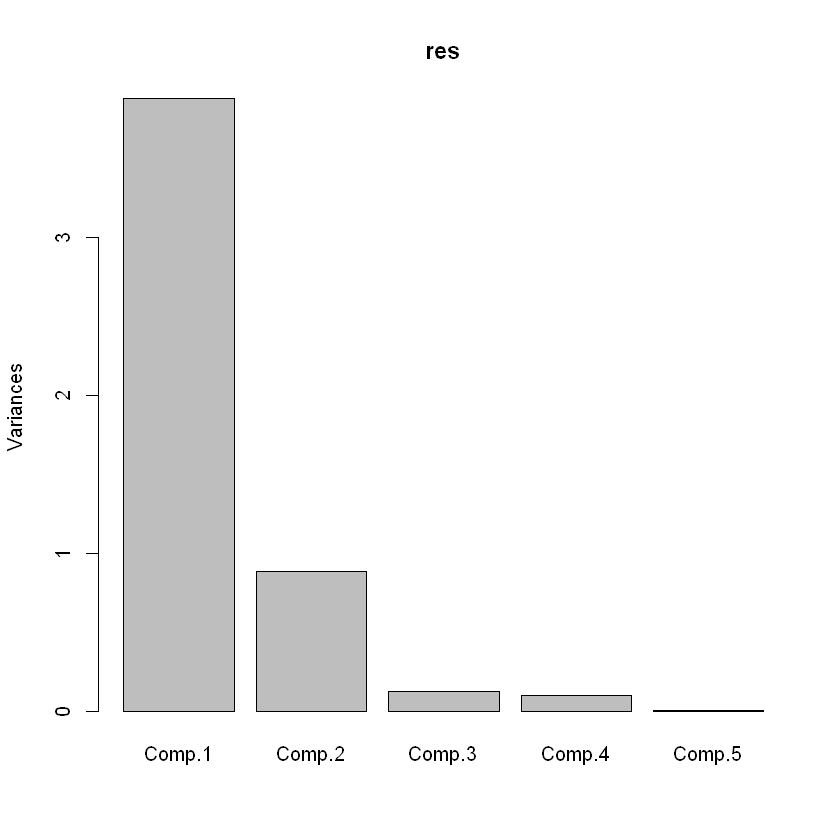

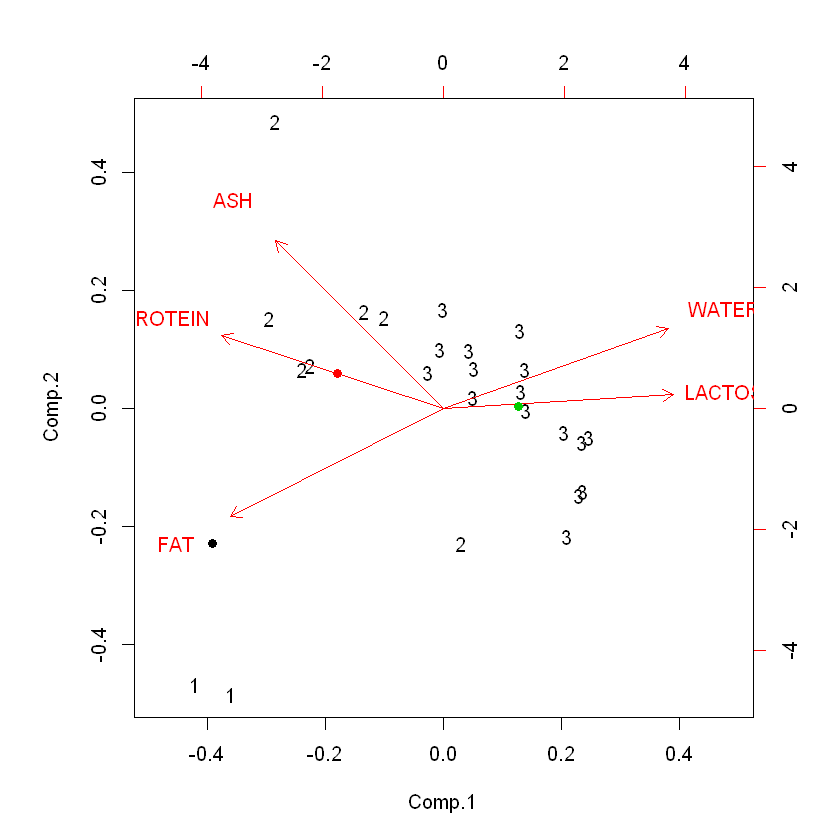

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.


Respuesta: Al realizar el ejercicio con diferentes k, podemos notar como al agruparlos en un numero mayor de cluster, a estos se les nota la diferencia respecto a los otros grupos.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


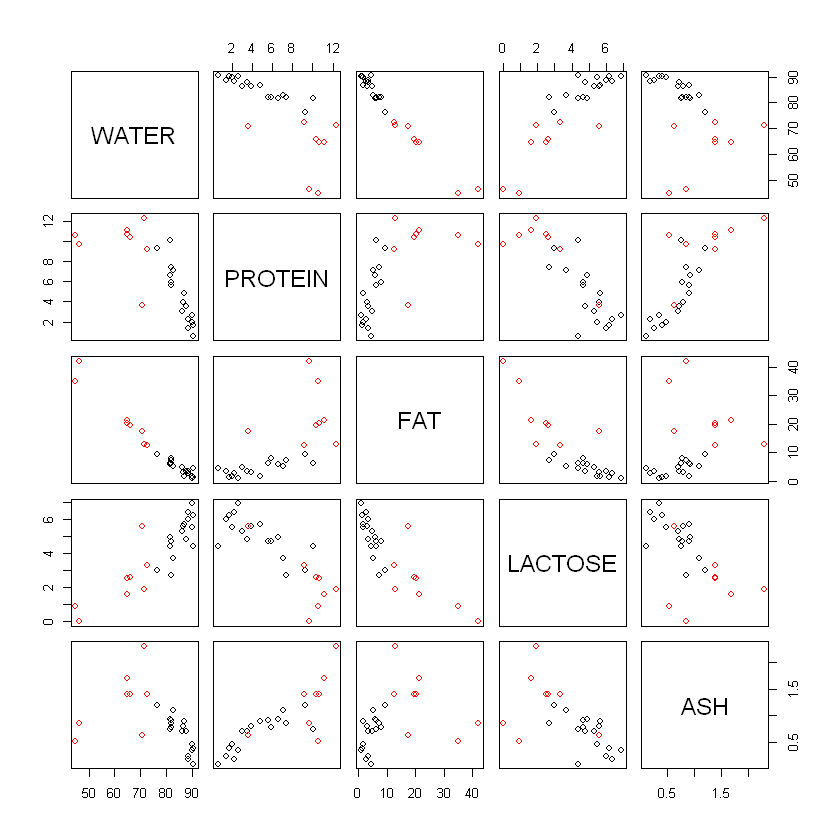

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003
-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632


K-means clustering with 2 clusters of sizes 17, 8

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 85.48824 4.570588  4.488235 4.994118 0.6688235
2 62.66250 9.700000 22.675000 2.300000 1.2762500

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2 

Within cluster sum of squares by cluster:
[1]  521.8994 1664.9235
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

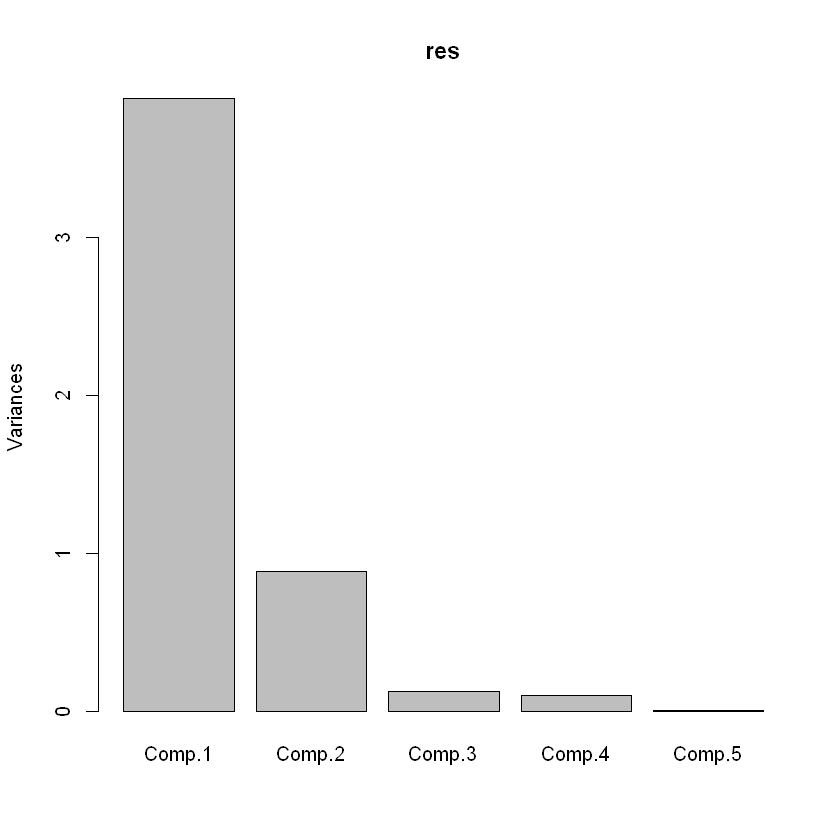

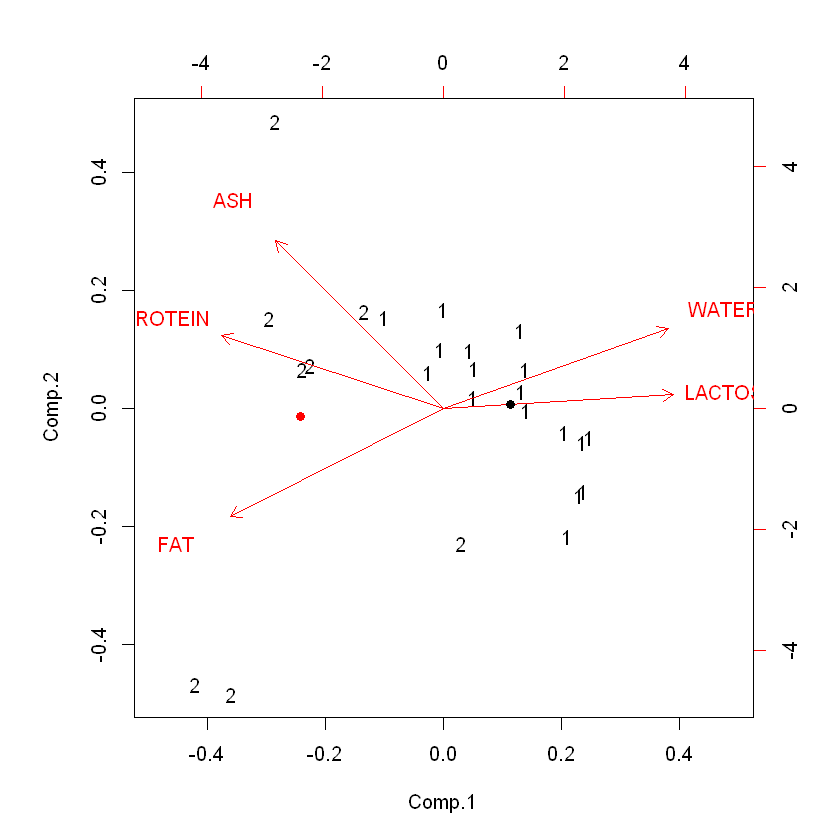

In [4]:
#ingresar valor de k0 =2
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


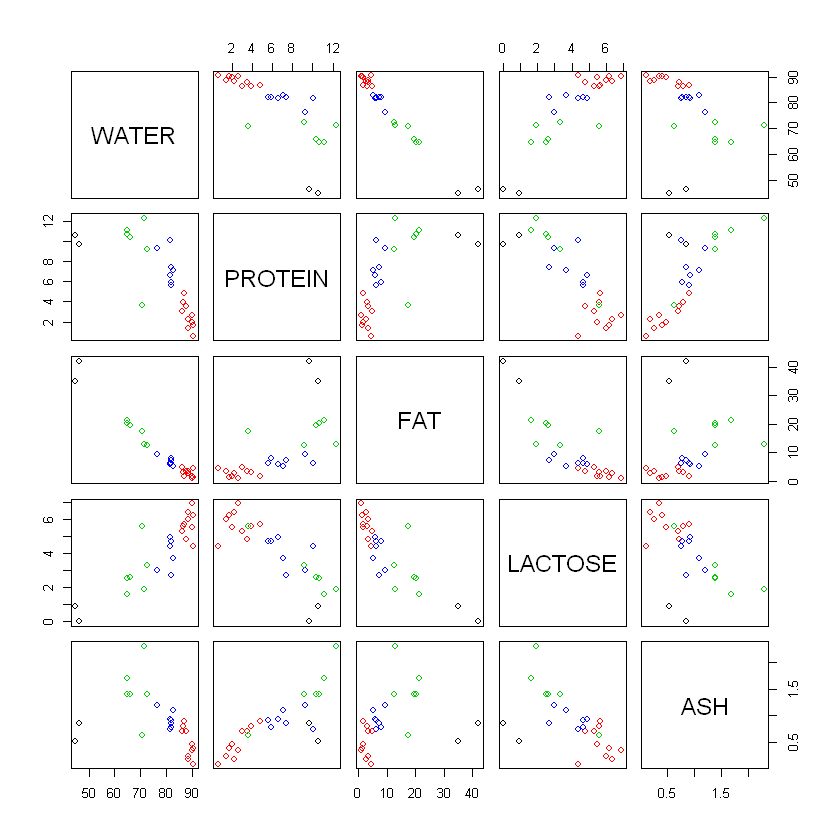

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957
1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595


K-means clustering with 4 clusters of sizes 2, 10, 6, 7

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 45.65000 10.150000 38.45000 0.450000 0.6900000
2 88.50000  2.570000  2.80000 5.680000 0.4850000
3 68.33333  9.550000 17.41667 2.916667 1.4716667
4 81.18571  7.428571  6.90000 4.014286 0.9314286

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         4          4          4          4          2          2          4 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          4          4          3          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          1          1 

Within cluster sum of squares by cluster:
[1]  27.19120  59.41225 191.74708  63.53491
 (between_SS / tot

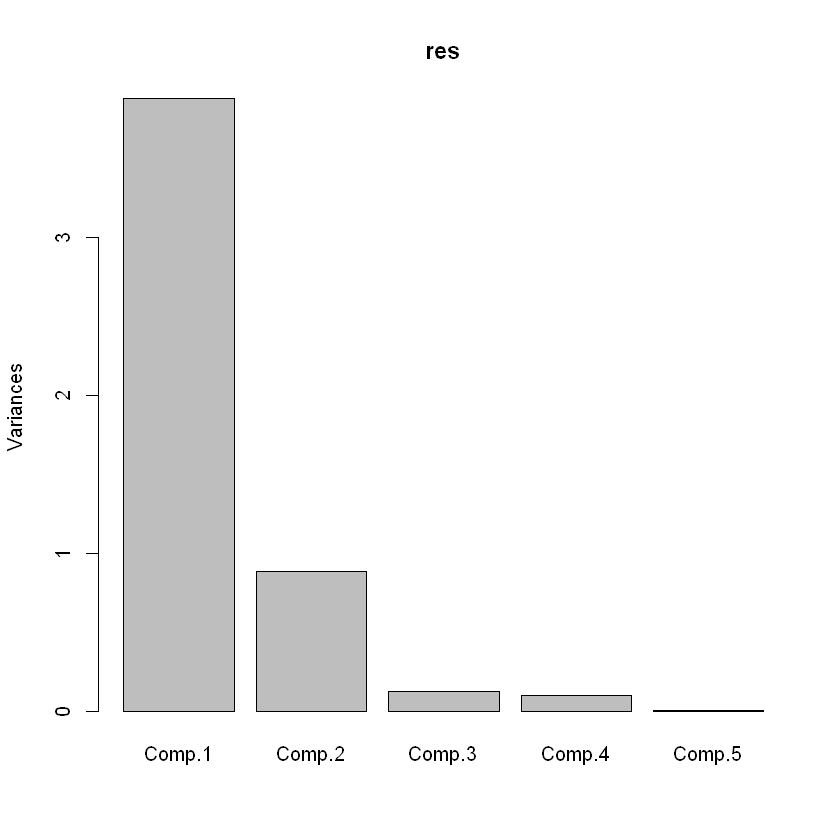

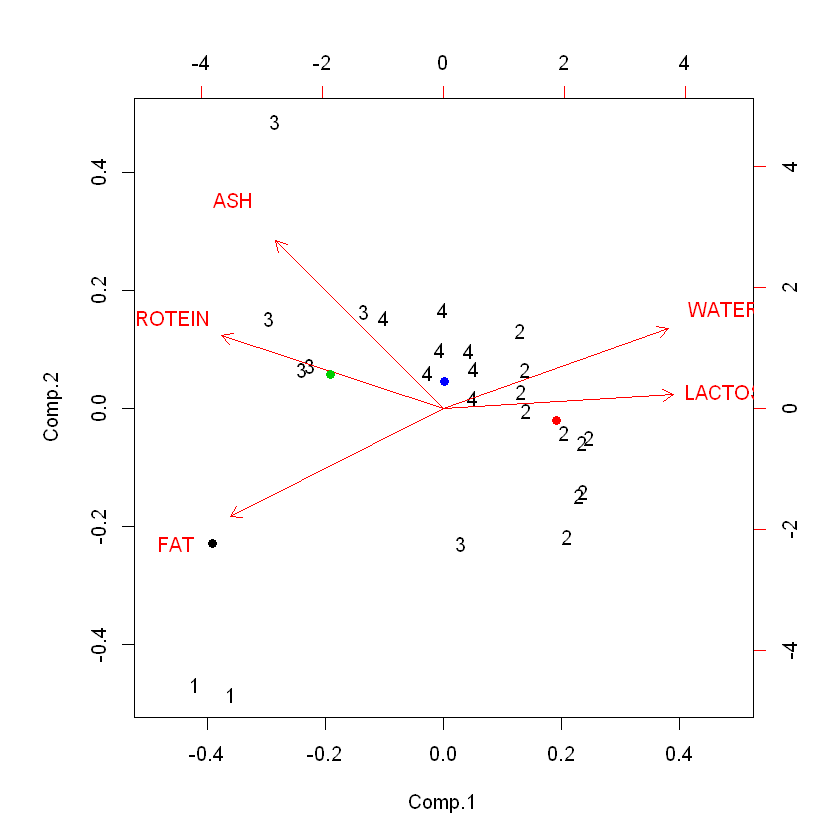

In [5]:
#ingresar valor de k0 =4
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


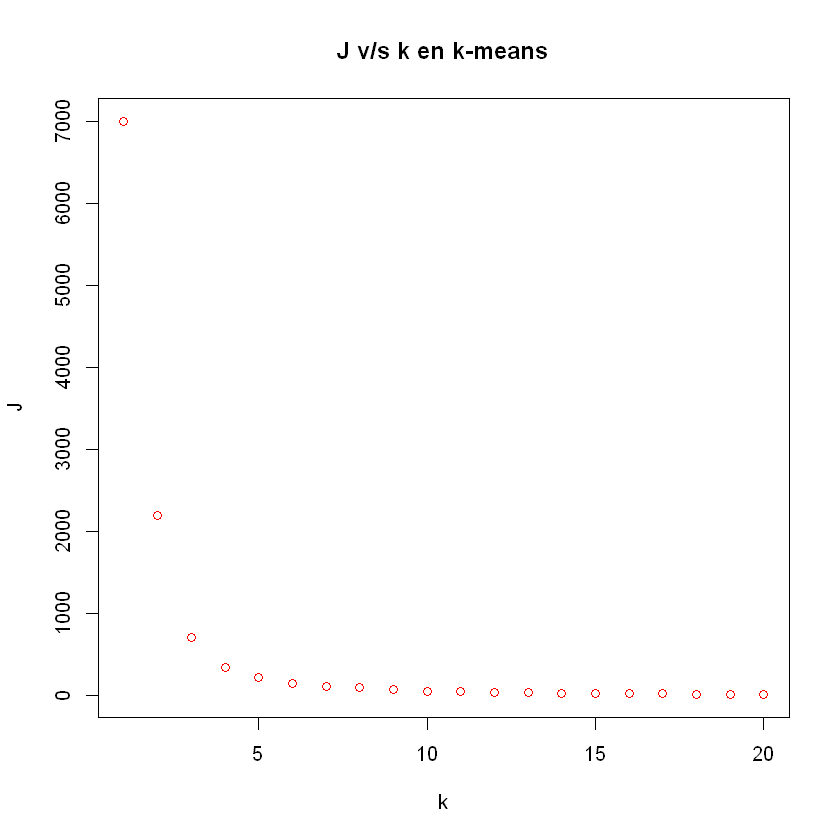

In [9]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

Según el gráfico anterior podemos distinguir que el mejor K es el numero 4, ya que luego se estabiliza la pendiente.

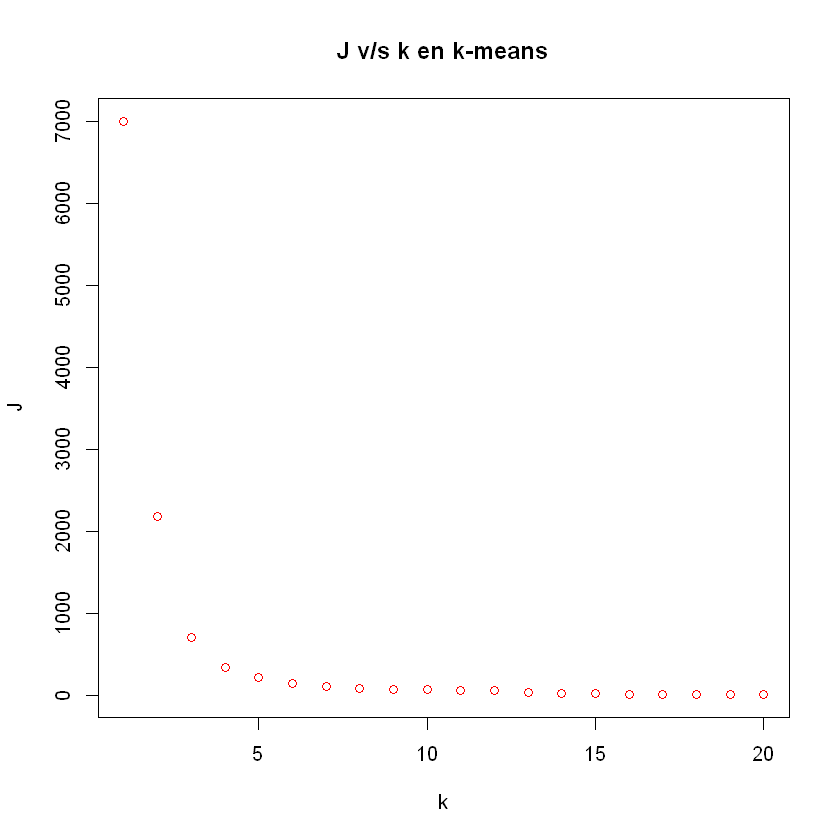

In [13]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20
pendienteK<-vector("list", fin_iter)
valoresK<- vector("list", fin_iter)
valoresJ<- vector("list", fin_iter)
indiceK<-Inf
valorK<-0
valorJ<-0
puntoK<-0
boolean<-TRUE

for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
    pendienteK[[k]]<- indiceK-J[k]
    indiceK<-J[k]
    valoresK[[k]]<-k
    valoresJ[[k]]<-J[k]
    if(boolean & pendienteK[[k]]<10){
        valorK<-pendienteK[[k]]
        puntoK<-(k-1)
        valorJ<-J[k]
        boolean<-FALSE
    }
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

In [14]:
print(J)

 [1] 7005.089144 2186.822914  704.403726  341.885448  212.504458  141.106117
 [7]  109.515408   87.337075   72.139342   66.167795   59.382928   54.551253
[13]   36.319467   24.984703   18.883600   12.098733   14.264983   10.015450
[19]    7.090667    9.578917


In [15]:
sprintf("K: %i .......Valor : %f ....pendiente: %f ",puntoK,valorJ,valorK)

[1] "K: 9 .......Valor : 66.167795 ....pendiente: 5.971547 "

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

In [16]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
dato <-read.csv("DatosUsoFacebook.csv",sep=";",header=TRUE)
summary(dato)

       R1              R2              R3              R4       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000   Median :3.000   Median :3.000   Median :2.000  
 Mean   :2.556   Mean   :2.604   Mean   :2.519   Mean   :2.262  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R5              R6              R7              R8       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :3.000  
 Mean   :1.348   Mean   :1.882   Mean   :2.374   Mean   :2.642  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :3.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R9             R10             R11             R12       
 Min.   :1.000   Min.   :

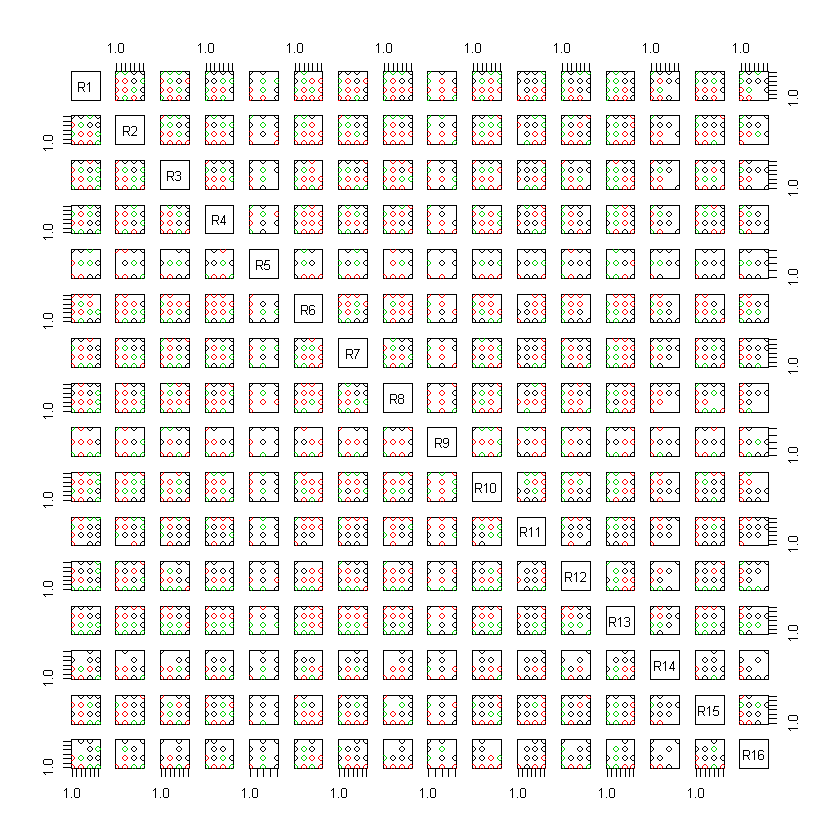

In [18]:
k0=3
cl<-kmeans(dato,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(dato,col=cl$cluster)

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
2.0013583,-0.08187328,0.0007586727,0.1150741,-0.01680933,-0.24562565,-0.12870925,-0.04518485,0.046214832,-0.1132752,-0.004685423,0.03151902,-0.067399166,-0.007798519,-0.01673335,0.097595499
-0.8973154,-0.61686890,-0.6881671274,0.2865755,-0.14985181,-0.04322486,-0.03753153,0.04763180,-0.005834374,0.2650329,-0.037696862,0.08401351,-0.003061467,-0.035432962,0.03557493,0.008955425
-0.7184329,0.75558699,0.7639798507,-0.4170521,0.18091001,0.25856390,0.15202391,-0.01419435,-0.033130075,-0.1973880,0.045901480,-0.12036464,0.061172344,0.046054403,-0.02518483,-0.093603757


K-means clustering with 3 clusters of sizes 54, 70, 63

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.851852 2.925926 3.074074 2.351852 1.648148 1.703704 2.796296 2.981481
2 2.085714 2.285714 2.357143 2.271429 1.285714 2.242857 2.214286 2.428571
3 2.825397 2.682540 2.222222 2.174603 1.158730 1.634921 2.190476 2.587302
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.666667 1.870370 2.685185 2.222222 2.685185 1.611111 2.296296 1.703704
2 1.257143 2.000000 3.628571 1.671429 3.114286 1.300000 1.457143 1.200000
3 1.285714 1.984127 3.412698 1.412698 1.571429 1.126984 1.507937 1.142857

Clustering vector:
  [1] 2 3 2 2 2 3 3 2 2 2 2 3 2 1 1 3 2 2 1 1 1 3 1 1 3 3 2 2 3 3 2 2 1 2 2 2 3
 [38] 2 2 2 3 3 1 2 3 3 2 3 2 2 3 2 2 1 1 3 2 1 1 1 3 1 3 3 2 1 3 1 1 1 1 3 3 1
 [75] 3 3 2 3 2 2 3 3 1 1 1 2 2 3 2 1 3 1 3 3 1 2 2 2 1 3 1 2 2 3 2 3 2 2 3 2 2
[112] 1 2 1 3 2 1 3 3 3 2 3 3 3 3 3 3 1 2 2 1 2 1 2 1 1 1 1 2 2 3 3 1 1 2 3 1

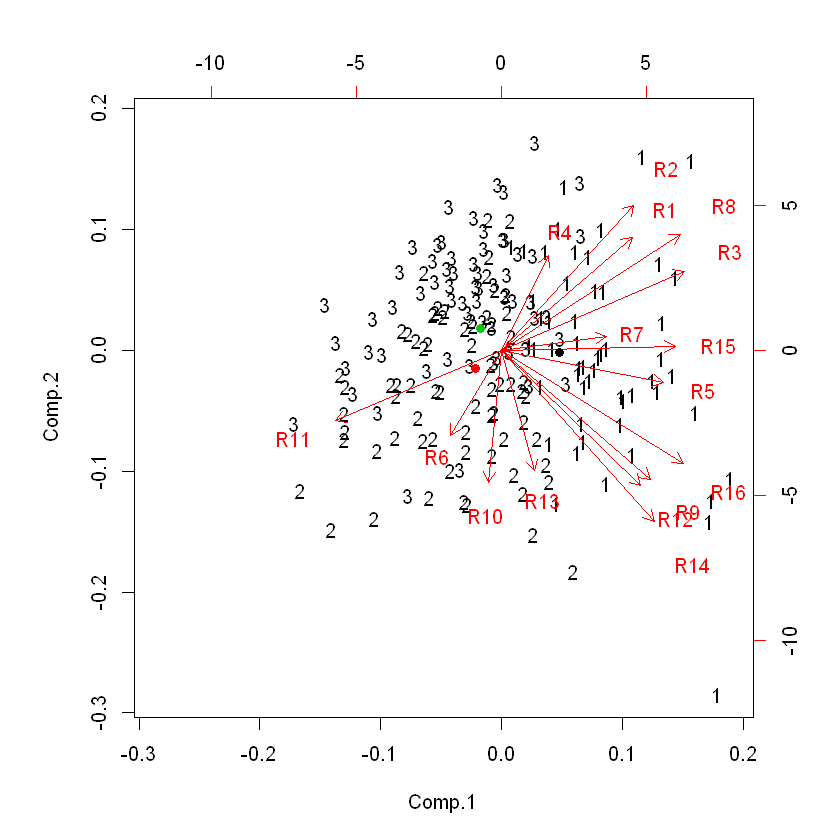

In [20]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(dato, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not co

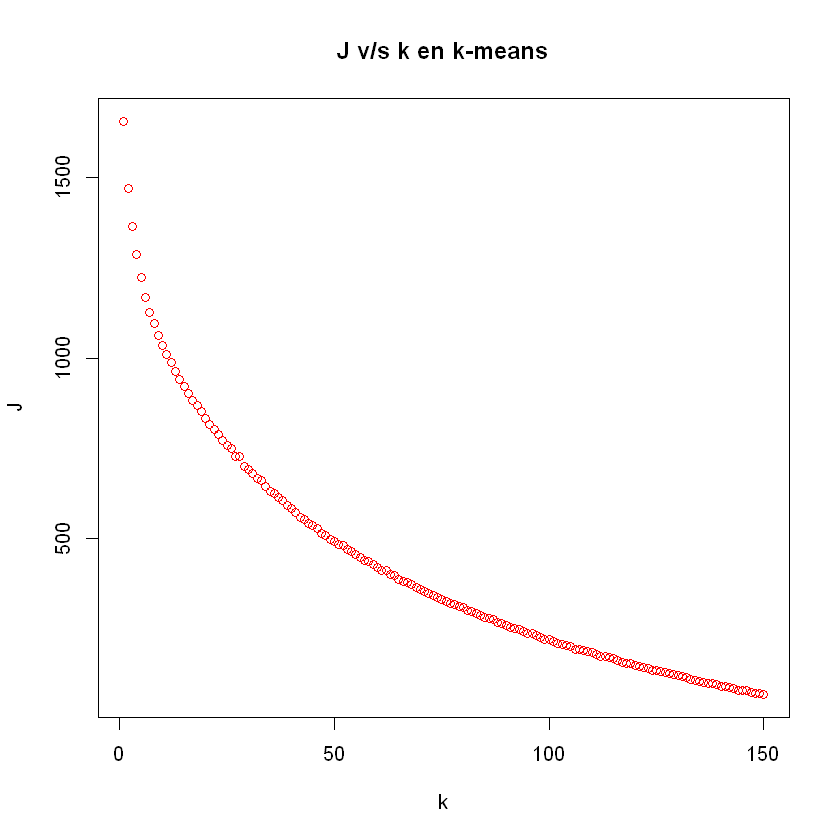

In [22]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,150)
fin_iter<-150
if(TRUE){
    pendienteK<-vector("list", fin_iter)
    valoresK<- vector("list", fin_iter)
    valoresJ<- vector("list", fin_iter)
    indiceK<-Inf
    valorK<-0
    valorJ<-0
    boolean<-TRUE 
}

for (k in 1:fin_iter){
     cl<-kmeans(dato,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
    if(TRUE){
        pendienteK[[k]]<- indiceK-J[k]
        indiceK<-J[k]
        valoresK[[k]]<-k
        valoresJ[[k]]<-J[k]
        if(boolean & pendienteK[[k]]<10){
            valorK<-(k-1)
            valorJ<-J[k]
            boolean<-FALSE
        }
    }
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 


In [23]:
print(J)

  [1] 1655.03743 1468.34063 1364.63111 1286.92815 1221.94998 1168.20756
  [7] 1127.60195 1094.62317 1062.40651 1035.09823 1010.98746  987.34897
 [13]  963.56158  940.60508  920.50228  902.13657  883.29666  867.72726
 [19]  852.04650  832.18782  816.40532  801.51948  788.26217  772.71991
 [25]  759.64570  749.95185  729.18226  726.68139  700.70487  692.64991
 [31]  680.50833  665.75379  660.24022  646.10462  630.97082  625.48413
 [37]  614.40873  606.37247  593.29048  583.00577  573.86389  559.87222
 [43]  554.06836  542.70040  535.84048  528.13258  515.21515  509.61429
 [49]  498.83810  493.80952  484.12540  481.97500  471.12262  464.04167
 [55]  457.11468  449.14206  439.10278  437.35357  429.51270  422.21667
 [61]  411.67500  411.80476  402.21905  398.70833  387.73571  383.25159
 [67]  378.79405  373.15714  365.50000  358.92738  353.63333  349.73333
 [73]  343.69762  337.44524  333.25238  327.15000  321.68571  318.59286
 [79]  312.83333  309.05000  300.76667  298.08333  292.65000  28

In [24]:
sprintf("K: %i .......Valor : %f ....pendiente: %f ",puntoK,valorJ,valorK)

[1] "K: 9 .......Valor : 749.951845 ....pendiente: 25.000000 "